In [21]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import costfun.costfun as cost
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)
importlib.reload(cost)

from utils.fit_functions import *

#--- importet matplotlib
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib
%matplotlib inline


#--- mathematics and data modules
import numpy as np
import pandas as pd
import random
import scipy.stats as stats

#--- other modules
import os
import warnings
warnings.filterwarnings('ignore')

import copy
from scipy.special import binom
from scipy.optimize import curve_fit as fit

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')
a = np.array([[0, 1, 0, 1, 2],
       [2, 3, 3, 2, 7]])
print(a[0])
print(np.transpose(a)[0])

../results/HEISENBERG/disorder/PBC/
[0 1 0 1 2]
[0 2]


In [22]:

def typical(data):
    return np.exp(np.sum(np.log(data) / len(data)))

basedir = "./CriticalParameters/"
sizes = range(12, 19, 2)
def load_critical_data(crit_fun = 'free', scaling_ansatz = 'FGR', set_class = None):
    if set_class is None: set_class = cf.plot_settings
    settings = getattr(set_class, 'settings')
    vs = settings['vs']

    cost_fun = []
    crit_exp = []
    crit_pars = []
    critical_fun = cost.crit_functions_dict[crit_fun]
    for file in os.listdir(basedir):
        info = hfun.remove_info(hfun.info_param(cf.params_arr), settings['scaling'], settings['vs'])
        prefix = "GapRatio" + info + "_critfun=%s_ansatz=%s_pert=%s_seed"%(crit_fun, scaling_ansatz, vs)
        if file.startswith(prefix):
            file = basedir + file
            if os.path.exists(file):
                data = np.load(file)
                cost_fun.append(data['costfun'])
                crit_exp.append(data["crit exp'"])
                critics = []
                for i in range(len(data) - 2):
                    critics.append(data["x_%d"%i])
                crit_pars.append(np.array(critics))
    
    num_of_sizes = len(crit_pars[0])
    crit_pars = np.transpose(crit_pars)
    return np.array(cost_fun), np.array(crit_exp), np.array(crit_pars), num_of_sizes

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')
cost_fun, crit_exp, crit_pars, num_of_crit = load_critical_data(set_class=set_class)



print(typical(crit_exp))
print([typical(crit_pars[i]) for i in range(num_of_crit)])


1.5011082353480572
[0.06122460997965136, 0.057650619607717106, 0.046993649464856624, 0.036092760238894364]


In [23]:

def plot_dist(vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR'):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    fig, (ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=3, figsize=(10,4), dpi = 100, constrained_layout=True, sharey=False)    

    cost_fun, crit_exp, crit_pars, num_of_crit = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)

    ylab = hfun.var_name if settings['vs_idx'] == 2 else settings['vs']
    ax1.hist(crit_exp, bins = 30)
    ax1.set_title("critical exponent- " + r"$\nu$" + "\n -distribution")
    sizes = np.array(range(12, 19, 2))

    for i in range(num_of_crit):
        ax2.hist(crit_pars[i], bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='bar', linewidth=3, stacked=True)

    hist, edge = np.histogram((crit_pars[-1]), bins = 30)
    ax2.set_ylim( None, 1.5*max( hist ) )

    ax2.set_title(r"$%s_c$"%ylab + " distribution\n for each system size")
    for i in range(num_of_crit):
        ax3.hist(np.log10(crit_pars[i]), bins = 30, label=r"$L=%d$"%(sizes[i]), histtype='step', linewidth=3)
    ax3.set_title(r"$log_{10}%s_c$"%ylab + " distribution\n for each system size")
    
    hist, edge = np.histogram(np.log10(crit_pars[-1]), bins = 30)
    ax3.set_ylim( None, 1.5*max( hist ) )
    
    ax2.legend(fontsize=8)
    ax3.legend(fontsize=8, loc='upper left')
    print(typical(crit_exp))
    print([typical(crit_pars[i]) for i in range(num_of_crit)])
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    fig.suptitle("Scaling ansatz:\t" + r"$%s$"%cost.scale_ansatz_label[scaling_ansatz](lab), fontsize=16)


# DISTRIBUTION $w=0.7=const$

0.24411266524341424
[0.015292983978059914, 0.0267825433026796, 0.10240142018812798, 0.07671809369441132]
1.5011082353480572
[0.06122460997965136, 0.057650619607717106, 0.046993649464856624, 0.036092760238894364]
0.29164164838386525
[0.05509150769298957, 0.055622943873740616, 0.0456113769962698, 0.035013404352098695]


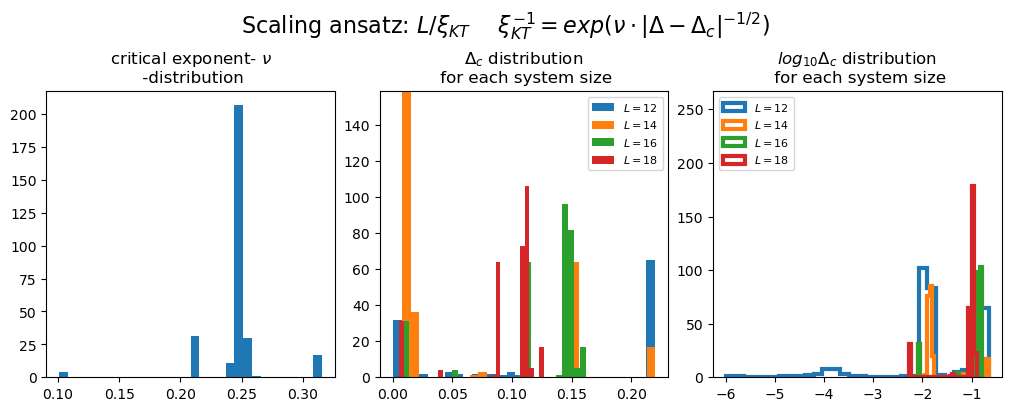

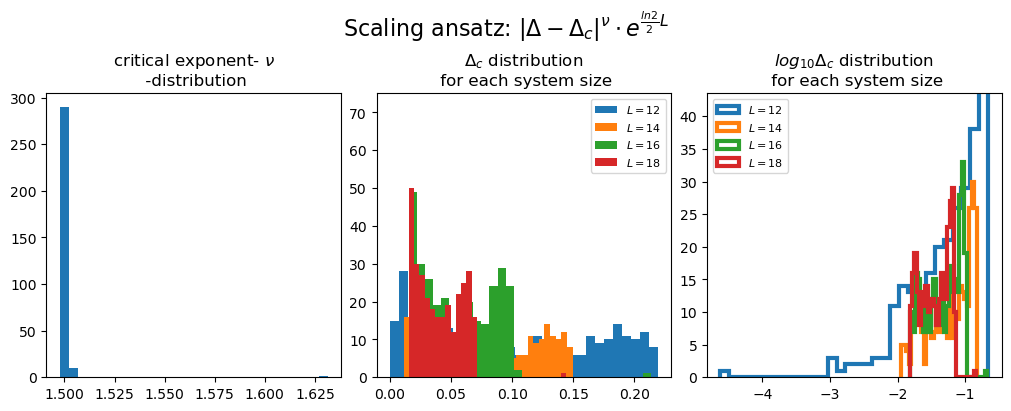

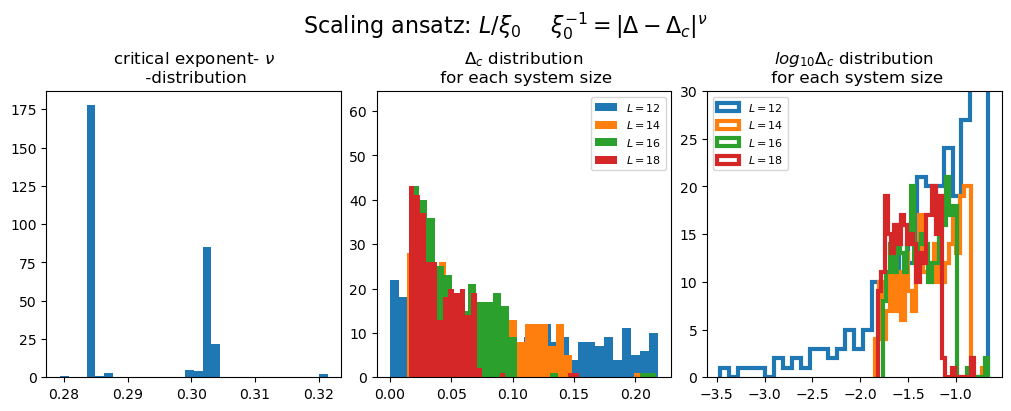

In [24]:
#plot_dist(vs='g', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='KT', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='g', scaling_ansatz='RG', crit_fun='free')

# DISTRIBUTIONS $\Delta=0.55=const$

0.17238409287980655
[0.03096105342661341, 0.008959788298106466, 0.06340425928286345, 0.028592601964441074]
1.1121419505372079
[0.0711665632775185, 0.05177063941634469, 0.03127071329148322, 0.019582782022446708]
0.22024377051636232
[0.07120187771236043, 0.05233788487876251, 0.03302515196434309, 0.01987842813715275]


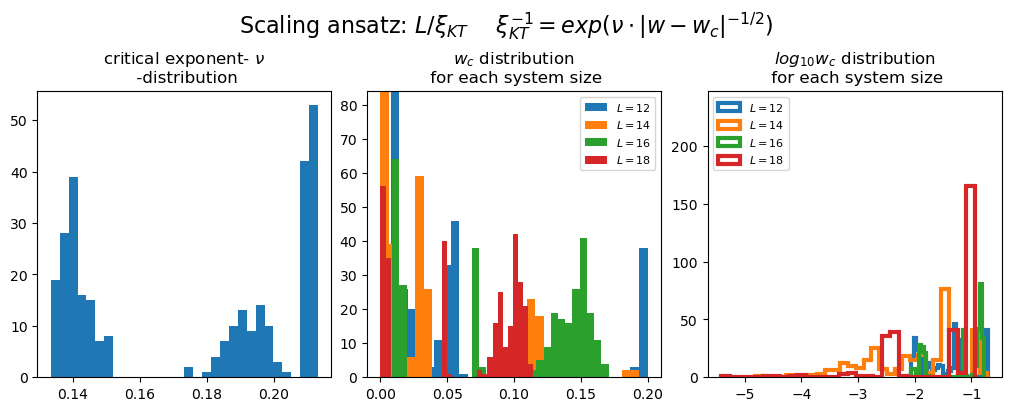

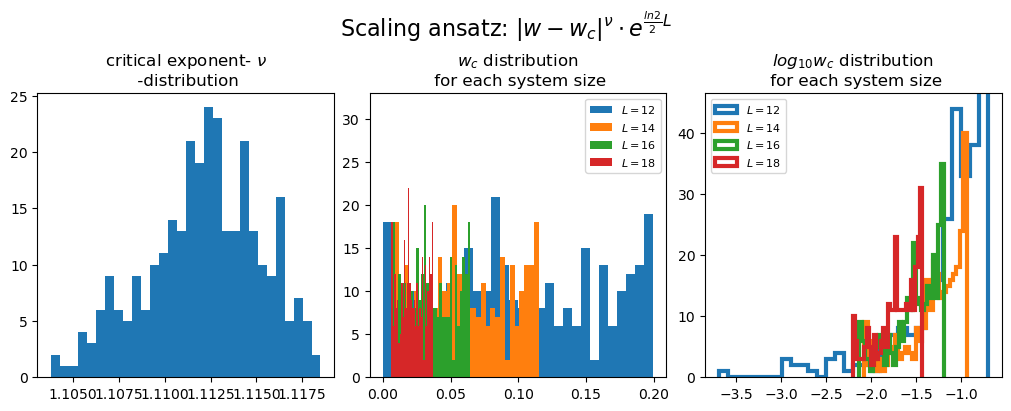

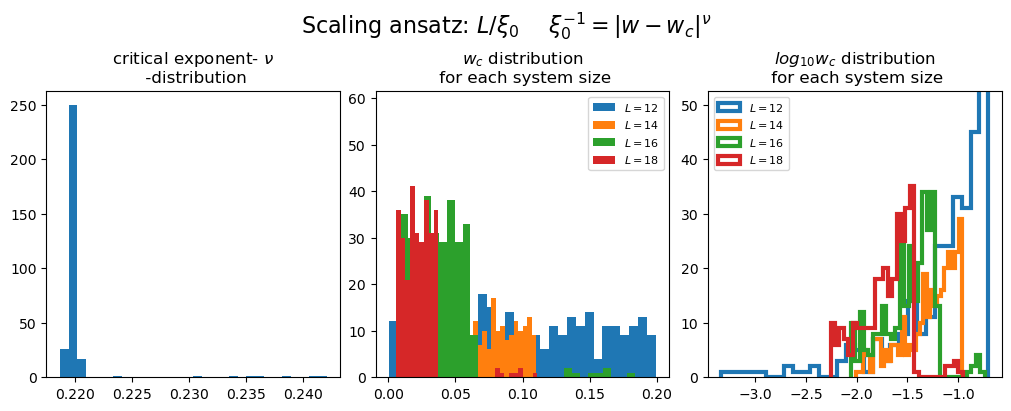

In [25]:

#plot_dist(vs='w', scaling_ansatz='classic', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='KT', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='FGR', crit_fun='free')
plot_dist(vs='w', scaling_ansatz='RG', crit_fun='free')

# SCALING ANSAETZE

In [122]:
from regex import X


def plot_gaps(axis, vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR'):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    cost_fun, crit_exp, crit_pars, num_of_sizes = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)
    
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    cost_fun = np.mean(cost_fun)
    crit_exp = np.mean(crit_exp)
    crit_pars = np.array([np.median(crit_pars[i]) for i in range(num_of_sizes)])
    
    xvals = []
    gap_ratio = []
    vals = range(12,19,2)
    for x in vals:
        cf.params_arr[settings['scaling_idx']] = x
        filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat" 
        if os.path.exists(filename):
            stats = hfun.read_python_saved_dat_file(filename)
            r_tmp = stats[1]
            xvals.append(np.array([stats[0][i] for i, r in enumerate(r_tmp) if r > 0.38]))
            gap_ratio.append(np.array([stats[1][i] for i, r in enumerate(r_tmp) if r > 0.38]))
    xvals = np.array(xvals)
    #vals, xvals, tau, gap_ratio = thouless.load(settings=settings)
    rescale_fun = cost.resc_functions_dict[scaling_ansatz]
    critical_fun = cost.crit_functions_dict[crit_fun]

    x_min = 1e10
    x_max = -1e10
    for i in range(num_of_sizes):
        xpoints = (rescale_fun(xvals[i], vals[i], critical_fun, crit_exp, *crit_pars))
        axis.scatter(xpoints, gap_ratio[i])

        idx = 0
        x = 0
        while x < 0.385:    x = gap_ratio[i][idx];  idx += 1;
        if xpoints[idx] < x_min: x_min = xpoints[idx]
        idx = 0
        x = 0
        while x < 0.525:     x = gap_ratio[i][idx];  idx += 1;
        if xpoints[idx] > x_max: x_max = xpoints[idx]

    x_min = 2.0 * x_min if x_min < 0 else 0.25 * x_min
    x_max = 2.5 * x_max if x_max > 0 else 0.5 * x_max
    if crit_fun == 'free_inv':
        crit_pars = np.array([1. / x for x in crit_pars])
    print("nu = ", crit_exp)
    xlab = cost.scale_ansatz_label[scaling_ansatz](lab)
    
    hfun.set_plot_elements(axis = axis, ylabel = "r", xlabel = xlab, settings=settings, 
                            font_size=8, set_legend=False, xlim=(None, None), ylim=(None, None))
    axis.set_xscale('linear')
    axis.set_yscale('linear')
    axis.set_ylim(0.37, 0.54)
    axis.set_xlim(x_min, x_max)

    axis.axhline(y=0.5307, ls='--', color='black')
    axis.axhline(y=0.3867, ls='--', color='black')

    left, bottom, width, height = [0.55, 0.25, 0.4, 0.4]
    ax = hfun.add_subplot_axes(axis, [left, bottom, width, height])
    sizes = np.array([12 + 2 * i for i in range(num_of_sizes)])

    def fit_func(x, prefactor, alfa):
        return prefactor * (np.sqrt(x) / binom(x, x / 2))**alfa

    pars, pcov = fit(f=fit_func, 
                            xdata=sizes, 
                            ydata=crit_pars)
    ax.scatter(sizes, crit_pars, color='black')
    
    ax.plot(sizes, np.array(fit_func(sizes, 1.0, 1/2.)) / fit_func(sizes[0], 1.0, 1/2.) * crit_pars[0], linestyle='--', color='blue', label=r"$\sqrt{\omega_H}$")
    ax.plot(sizes, np.array(fit_func(sizes, 1.0, 1/3.)) / fit_func(sizes[0], 1.0, 1/3.) * crit_pars[0], linestyle='--', color='red', label=r"$\sqrt[3]{\omega_H}$")
    fit_name = r"$\omega_H^{%.2f}$"%pars[1]

    ax.plot(sizes, fit_func(sizes, pars[0], pars[1]), linestyle='--', color='black', label=fit_name)
    hfun.set_plot_elements(axis = ax, ylabel = lab + "_c", xlabel = "L", settings=settings, 
                            font_size=8, set_legend=True, xlim=(None, None), ylim=(None, None))
    ax.set_xscale('linear')
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    #ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    #ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%.2f"%x))
    
    ax.set_title(r"$CF=%.4f$"%cost_fun)

print("ek")


ek


nu =  4.543780954191107
nu =  0.22025879267360937
nu =  0.1753248155783119
nu =  1.1121462165040301


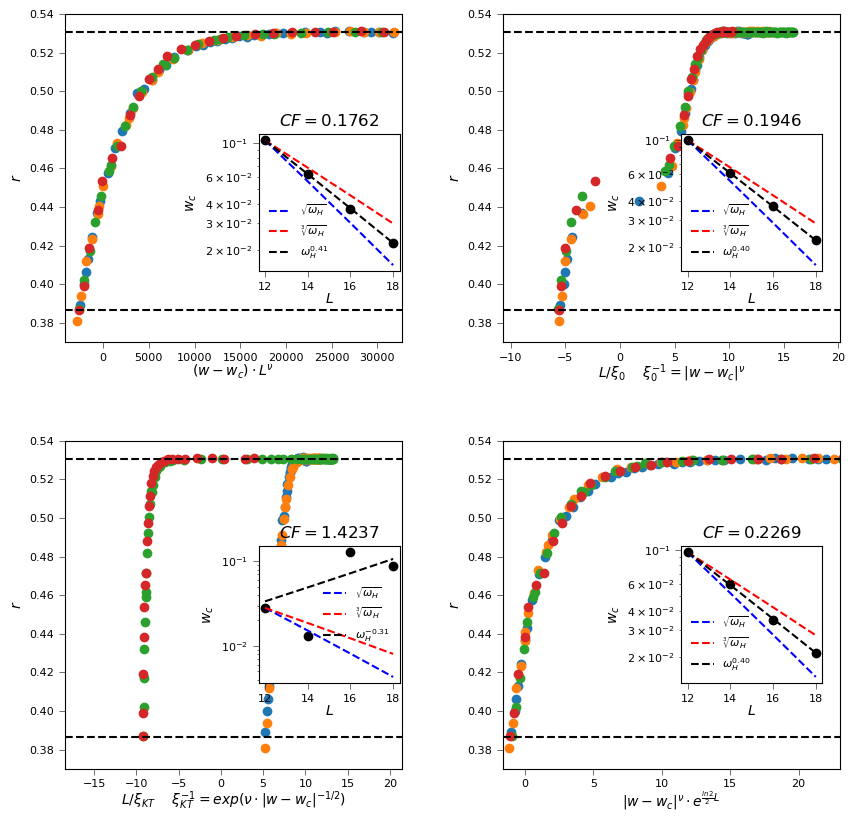

In [123]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)


plot_gaps(ax1, vs = 'w', scaling_ansatz='classic')
plot_gaps(ax2, vs = 'w', scaling_ansatz='RG')
plot_gaps(ax3, vs = 'w', scaling_ansatz='KT')
plot_gaps(ax4, vs = 'w', scaling_ansatz='FGR')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

nu =  3.4296867182998128
nu =  0.2917830095109793
nu =  0.2457405514392588
nu =  1.5011263557182524


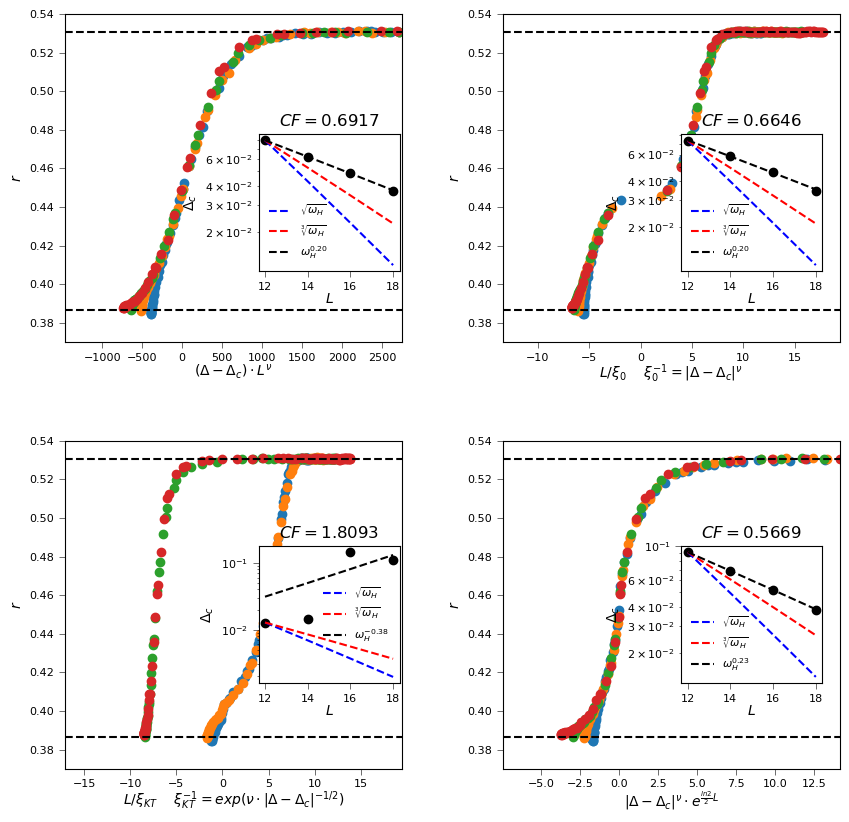

In [124]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)


plot_gaps(ax1, vs = 'g', scaling_ansatz='classic')
plot_gaps(ax2, vs = 'g', scaling_ansatz='RG')
plot_gaps(ax3, vs = 'g', scaling_ansatz='KT')
plot_gaps(ax4, vs = 'g', scaling_ansatz='FGR')

fig.subplots_adjust(wspace=0.3, hspace=0.3)